In [15]:
import pandas as pd
import numpy as np

In [16]:
# Cargar el dataset
df = pd.read_csv("bank-full.csv", sep=";")

# Exploración inicial
print(df.head())
df.info()

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Podemos tomar como valores nulos unknown, pero por mientras podemos destacar que el dataframe tiene 17 clumnas con 45211 filas sin valores nulos. Algunas columnas son numéricas (age, balance, day, duration, etc.), mientras que otras son categóricas (job, marital, education, contact, etc.).

In [17]:
# Identificar valores 'unknown'
print('Identificación de valores unknown: \n', df.apply(lambda x: x.value_counts().get('unknown', 0)))
# Revisar distribución de la variable objetivo
print('Distribución de la clase: \n', df['y'].value_counts())

Identificación de valores unknown: 
 age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64
Distribución de la clase: 
 y
no     39922
yes     5289
Name: count, dtype: int64


Valores "unknown" en las variables categóricas: 

- La columna poutcome tiene 36,959 valores unknown, lo cual representa la mayoría de los datos en esa variable.
- Otras columnas como contact (13,020 unknown), education (1,857 unknown) y job (288 unknown) también tienen valores desconocidos.

Distribución de la variable objetivo (y):

- La clase 'no' tiene 39,922 observaciones, mientras que 'yes' tiene 5,289.
- Esto sugiere un desbalance de clases, lo que puede afectar el desempeño de ciertos modelos de Machine Learning.

In [18]:
#Reemplazar 'unknown' por la moda en las columnas 'job', 'education', 'contact'
for col in ['job', 'education', 'contact']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_value)

#Eliminación de la columna 'poutcome' porque el 80% de los datos son 'unknown'
df.drop(columns=['poutcome'], inplace=True)
#Mostrar todas las columnas
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


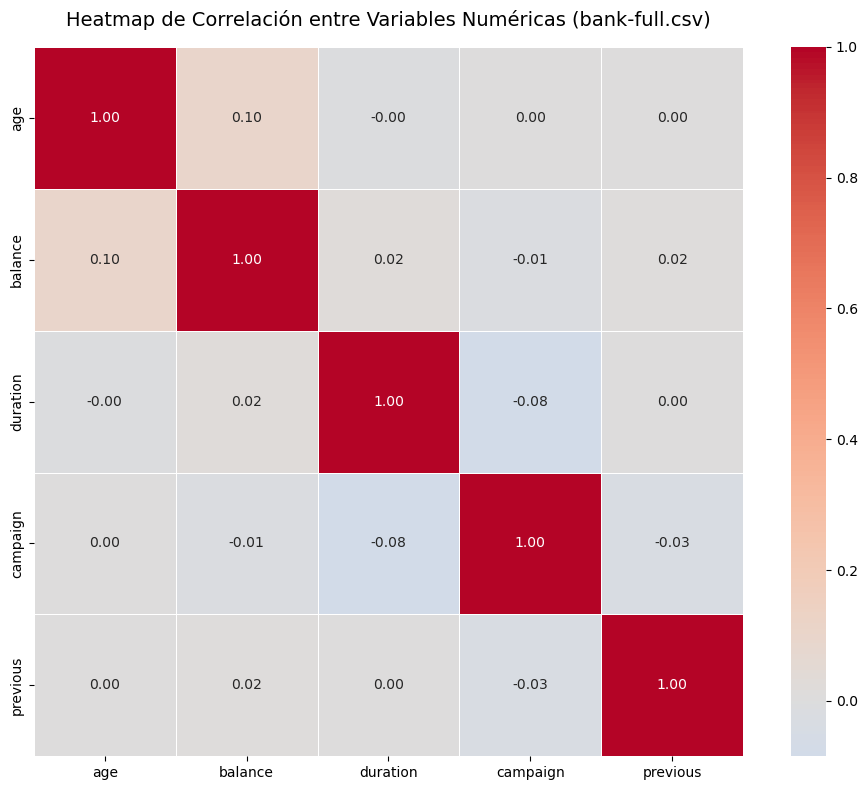

In [43]:
#Seleccionar las columnas numéricas de interés
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'previous']
df_numeric = df[numeric_cols]
#Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, annot_kws={'size': 10}, linewidths=0.5)
plt.title('Heatmap de Correlación entre Variables Numéricas (bank-full.csv)', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

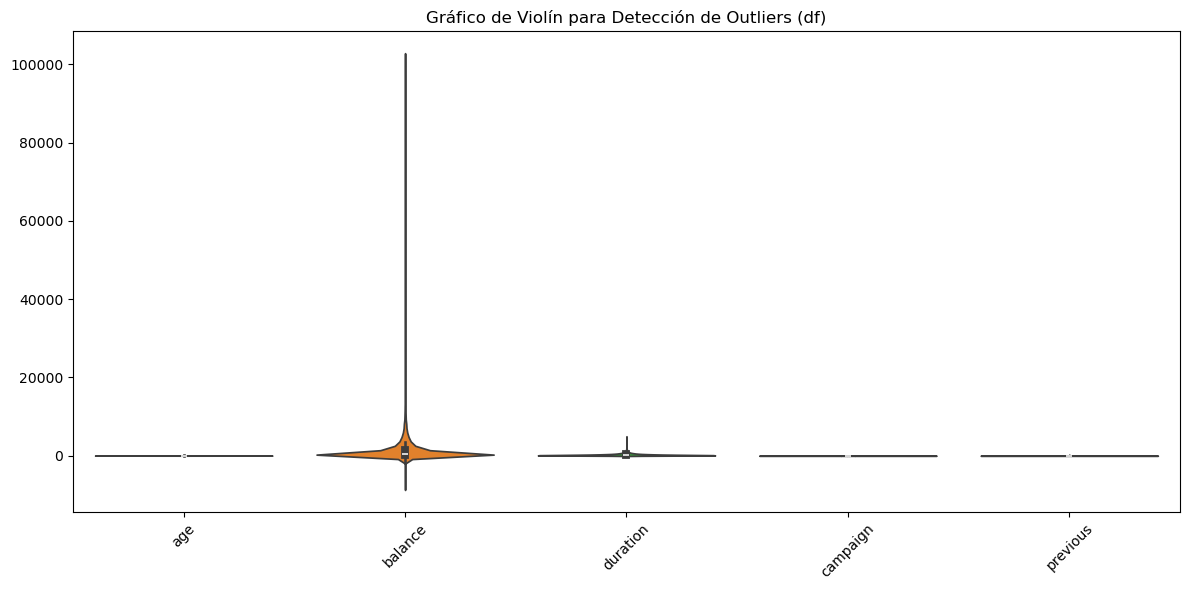

In [19]:
# Gráfico de violín para detectar outliers en variables numéricas
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'previous']
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[numeric_cols])
plt.title('Gráfico de Violín para Detección de Outliers (df)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Creamos un DataFrame nuevo con las columnas categóricas en numéricas con el nombre: df_encoded

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copiar el dataframe original
df_encoded = df.copy()

# 1. Codificar 'pdays': contacto previo (0: no, 1: sí)
df_encoded['pdays_contacted'] = (df_encoded['pdays'] != -1).astype(int)
df_encoded.drop(columns='pdays', inplace=True)

# 2. Revisión de 'previous' (si quieres ver cuántos ceros hay)
print("Cantidad de registros con previous == 0:", (df_encoded['previous'] == 0).sum())

# 3. Codificación ordinal de 'education'
education_order = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}
df_encoded['education_ord'] = df_encoded['education'].map(education_order)
df_encoded.drop(columns='education', inplace=True)

# 4. Agrupar 'job' en categorías
def classify_job(job):
    if job in ['student']:
        return 'studying'
    elif job in ['unemployed', 'unknown']:
        return 'unemployed'
    else:
        return 'working'

df_encoded['job_grouped'] = df_encoded['job'].apply(classify_job)

# 5. Convertir 'month' a número
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df_encoded['month_num'] = df_encoded['month'].map(month_to_num)
df_encoded.drop(columns='month', inplace=True)

# 6. One-hot encoding para variables nominales (omitimos una columna con drop_first)
df_encoded = pd.get_dummies(df_encoded, columns=['job_grouped', 'marital', 'contact'], drop_first=True, dtype=int)

# 7. Label Encoding para columnas binarias
label_cols = ['default', 'housing', 'loan']
label_encoder = LabelEncoder()
for col in label_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

#Eliminar columnas innecesarias
columns_to_drop = ['marital_single', 'job']
df_encoded.drop(columns=columns_to_drop, inplace=True)

#Cambiar el nombre de la columna 'y' a 'clase'
df_encoded.rename(columns={'y': 'clase'}, inplace=True)

# Resultado final
print(df_encoded.info())
df_encoded.head()

Cantidad de registros con previous == 0: 36954
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     45211 non-null  int64 
 1   default                 45211 non-null  int32 
 2   balance                 45211 non-null  int64 
 3   housing                 45211 non-null  int32 
 4   loan                    45211 non-null  int32 
 5   day                     45211 non-null  int64 
 6   duration                45211 non-null  int64 
 7   campaign                45211 non-null  int64 
 8   previous                45211 non-null  int64 
 9   clase                   45211 non-null  object
 10  pdays_contacted         45211 non-null  int32 
 11  education_ord           45211 non-null  int64 
 12  month_num               45211 non-null  int64 
 13  job_grouped_unemployed  45211 non-null  int32 
 14  job_gro

,age,default,balance,housing,loan,day,duration,campaign,previous,clase,pdays_contacted,education_ord,month_num,job_grouped_unemployed,job_grouped_working,marital_married,contact_telephone
0,58,0,2143,1,0,5,261,1,0,no,0,3,5,0,1,1,0
1,44,0,29,1,0,5,151,1,0,no,0,2,5,0,1,0,0
2,33,0,2,1,1,5,76,1,0,no,0,2,5,0,1,1,0
3,47,0,1506,1,0,5,92,1,0,no,0,2,5,0,1,1,0
4,33,0,1,0,0,5,198,1,0,no,0,2,5,0,1,0,0


## Modelacion y analisis exploratorio


--- Evaluación del Modelo de Random Forest ---
Exactitud: 0.8995

Matriz de Confusión:
[[11614   363]
 [ 1000   587]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11977
         yes       0.62      0.37      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



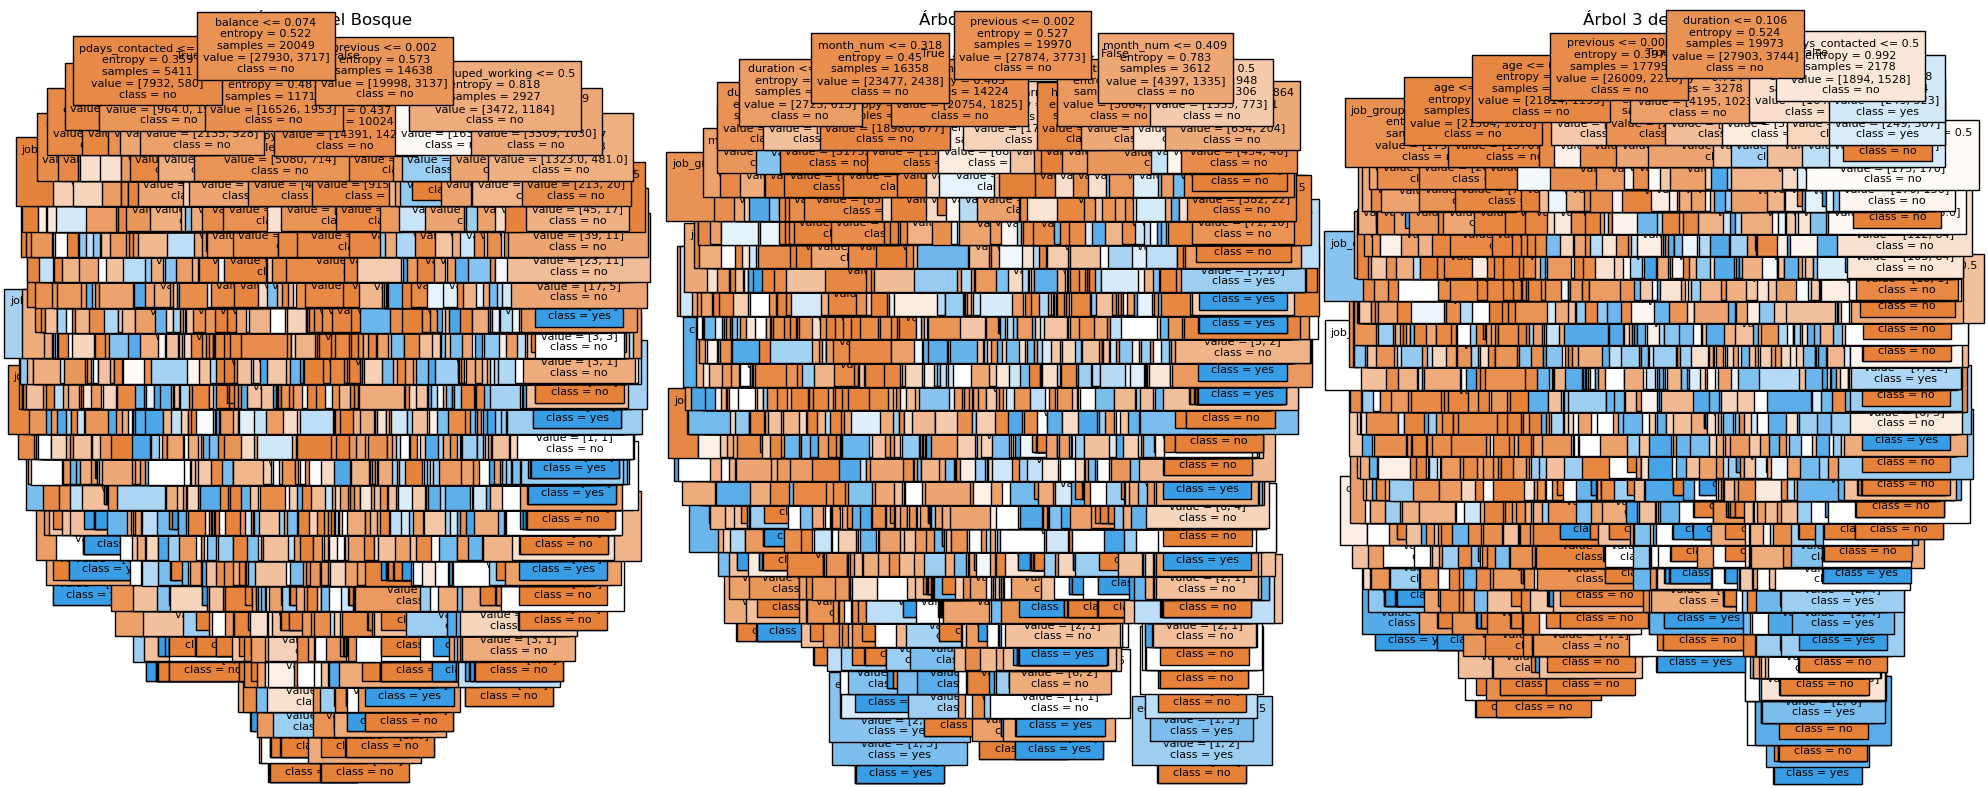

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# --- 2. Separar características (X) y variable objetivo (y) ---
X = df_encoded.drop('clase', axis=1)
y = df_encoded['clase']

# --- 3. Dividir los datos en conjuntos de entrenamiento y evaluación ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 4. Definir los atributos (nombres de las columnas) y los valores de la clase ---
atributos = list(X_train.columns)
valoresClase = ['no', 'yes']  # Corresponde a las etiquetas 0 y 1

# --- 5. Inicializar y entrenar el clasificador de Random Forest ---
algoritmo = RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)
modelo = algoritmo.fit(X_train, y_train)

# --- 6. Realizar la clasificación en el conjunto de evaluación ---
claseAsignada = modelo.predict(X_test)

# --- 7. Evaluar el modelo ---
print('\n--- Evaluación del Modelo de Random Forest ---')

# Exactitud
exactitud = accuracy_score(y_test, claseAsignada)
print(f'Exactitud: {exactitud:.4f}')

# Matriz de Confusión
matriz_confusion = confusion_matrix(y_test, claseAsignada)
print('\nMatriz de Confusión:')
print(matriz_confusion)

# Reporte de Clasificación (Precisión, Recall, F1-score por clase)
print('\nReporte de Clasificación:')
print(classification_report(y_test, claseAsignada, target_names=valoresClase))

# --- 8. Visualización de los primeros árboles del bosque (opcional, puede ser computacionalmente intensivo para muchos árboles) ---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
for i in range(3):
    tree.plot_tree(modelo.estimators_[i], feature_names=atributos, class_names=valoresClase, filled=True, ax=axes[i], fontsize=8)
    axes[i].set_title(f'Árbol {i+1} del Bosque')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar variables predictoras y variable objetivo
X = df_encoded.drop('clase', axis=1)
y = df_encoded['clase']

# Dividir el dataset en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = rf_model.predict(X_test)

# Resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8987024476555588
Confusion Matrix:
 [[11609   368]
 [ 1006   581]]
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94     11977
         yes       0.61      0.37      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



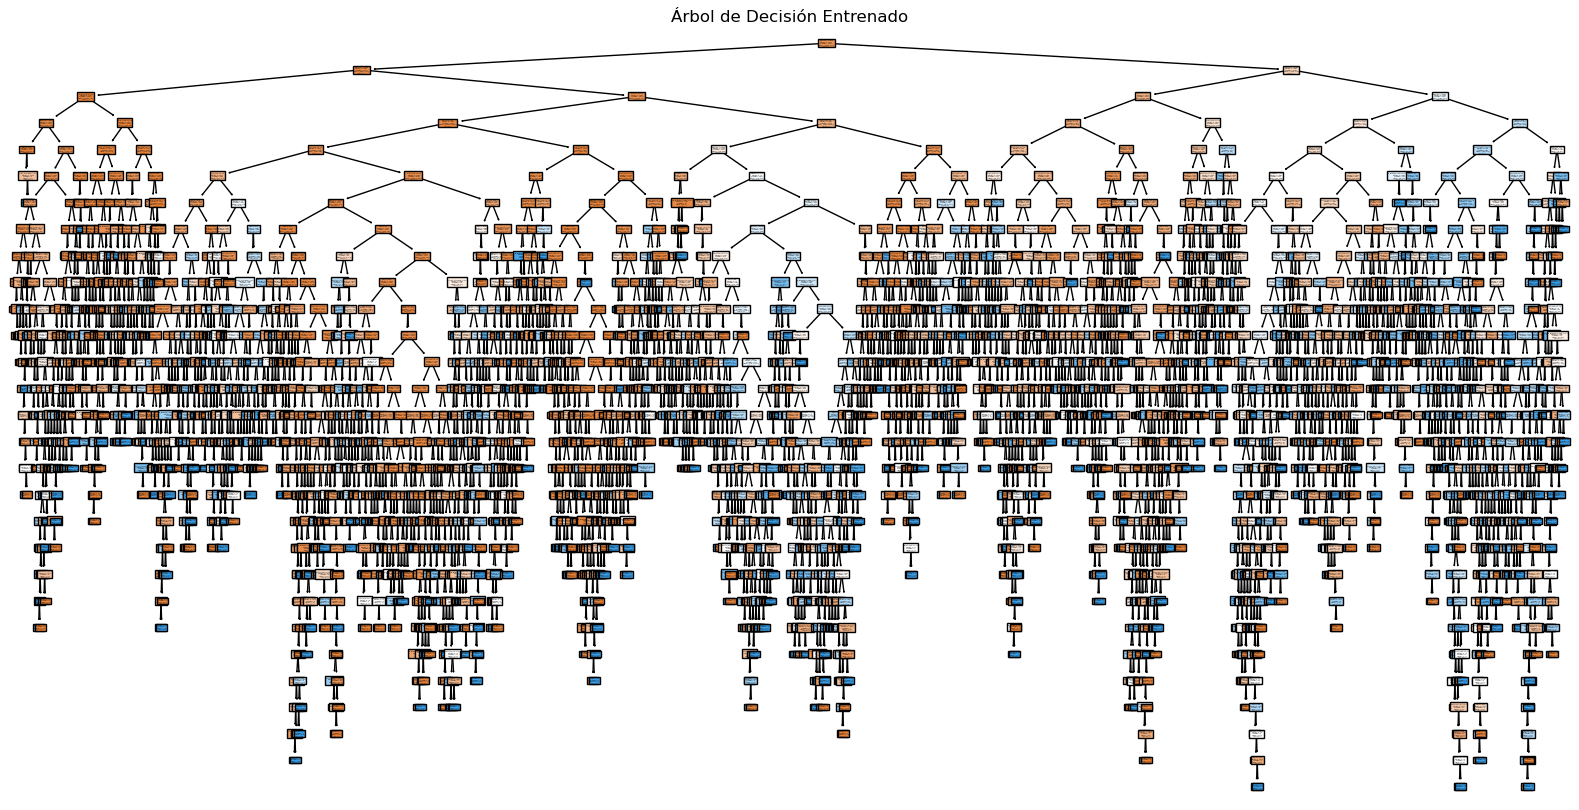


--- Evaluación del Modelo de Árbol de Decisión ---
Exactitud: 0.8671

Matriz de Confusión:
[[11062   915]
 [  888   699]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.93      0.92      0.92     11977
         yes       0.43      0.44      0.44      1587

    accuracy                           0.87     13564
   macro avg       0.68      0.68      0.68     13564
weighted avg       0.87      0.87      0.87     13564



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


# --- 2. Separar características (X) y variable objetivo (y) ---
X = df_encoded.drop('clase', axis=1)
y = df_encoded['clase']

# --- 3. Dividir los datos en conjuntos de entrenamiento y evaluación ---
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y asegura que la proporción de clases en el conjunto de prueba sea similar a la del conjunto de datos original

# --- 4. Definir los atributos (nombres de las columnas) y los valores de la clase ---
Atributos = list(X_train.columns)
ValoresClase = ['no', 'yes']  # Corresponde a las etiquetas 0 y 1

# --- 5. Inicializar y entrenar el clasificador de Árbol de Decisión ---
clasificador = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo = clasificador.fit(X_train, y_train)

# --- 6. Visualización del modelo de Árbol de Decisión ---
plt.figure(figsize=(20, 10))  # Ajusté el tamaño para mejor visualización
tree.plot_tree(modelo, feature_names=Atributos, class_names=ValoresClase, filled=True)
plt.title('Árbol de Decisión Entrenado')
plt.show()

# --- 7. Realizar la clasificación en el conjunto de evaluación ---
ClaseAsignada = modelo.predict(X_test)

# --- 8. Evaluar el modelo ---
print('\n--- Evaluación del Modelo de Árbol de Decisión ---')

# Exactitud
exactitud = accuracy_score(y_test, ClaseAsignada)
print(f'Exactitud: {exactitud:.4f}')

# Matriz de Confusión
matriz_confusion = confusion_matrix(y_test, ClaseAsignada)
print('\nMatriz de Confusión:')
print(matriz_confusion)

# Reporte de Clasificación (Precisión, Recall, F1-score por clase)
reporte_clasificacion = classification_report(y_test, ClaseAsignada, target_names=ValoresClase)
print('\nReporte de Clasificación:')
print(reporte_clasificacion)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop('clase', axis=1)
y = df_encoded['clase']

# 2. Dividir en entrenamiento y prueba (70/30)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Crear y entrenar el árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 4. Predecir sobre el conjunto de prueba
y_pred = tree_model.predict(X_test)

# 5. Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8715718077263345
Confusion Matrix:
 [[11098   879]
 [  863   724]]
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93     11977
         yes       0.45      0.46      0.45      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



***Creación de tablas***

In [27]:
print('Distribución de la clase objetivo (antes de cualquier transformación):')
print(df['y'].value_counts(normalize=True) * 100)

Distribución de la clase objetivo (antes de cualquier transformación):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [28]:
print('\nDistribución de la variable "job" (después de imputar valores unknown):')
print(df['job'].value_counts(normalize=True) * 100)


Distribución de la variable "job" (después de imputar valores unknown):
job
blue-collar      22.162748
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
Name: proportion, dtype: float64


In [29]:
print('\nDistribución de la variable "education" (después de imputar valores unknown):')
print(df['education'].value_counts(normalize=True) * 100)


Distribución de la variable "education" (después de imputar valores unknown):
education
secondary    55.426777
tertiary     29.419831
primary      15.153392
Name: proportion, dtype: float64


In [30]:
import pandas as pd
cross_tab_job_y = pd.crosstab(df['job'], df['y'], normalize='index') * 100
print('\nRelación entre el tipo de trabajo y la captación de clientes (% por tipo de trabajo):')
print(cross_tab_job_y)


Relación entre el tipo de trabajo y la captación de clientes (% por tipo de trabajo):
y                     no        yes
job                                
admin.         87.797331  12.202669
blue-collar    92.594810   7.405190
entrepreneur   91.728312   8.271688
housemaid      91.209677   8.790323
management     86.244449  13.755551
retired        77.208481  22.791519
self-employed  88.157061  11.842939
services       91.116996   8.883004
student        71.321962  28.678038
technician     88.943004  11.056996
unemployed     84.497314  15.502686


In [31]:
print('\nEstadísticas descriptivas de las variables numéricas:')
print(df_encoded.describe())


Estadísticas descriptivas de las variables numéricas:
                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day      duration      campaign      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419    258.163080      2.763841      0.580323   
std        8.322476    257.52

En la última tabla, tuvimos que hacer una modificación de los datos del DataFrame original, debido a que se representaban como 0 y -1, lo que no permitía tener una buena interpretación de los datos.

Ahora, las últimas 3 columnas, los datos son representados con 0 y 1, por esa razón los cuartiles de pdays y edication son 1 porque ya mayoría de los datos son '1'. 

## Transformación de los datos con MinMaxscaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Separar características y variable objetivo
X = df_encoded.drop(columns='clase')
y = df_encoded['clase']

# Instanciar y aplicar el escalador
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combinar nuevamente si lo necesitas en un solo dataframe
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Verifica el resultado
print(df_scaled.info())
df_scaled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     45211 non-null  float64
 1   default                 45211 non-null  float64
 2   balance                 45211 non-null  float64
 3   housing                 45211 non-null  float64
 4   loan                    45211 non-null  float64
 5   day                     45211 non-null  float64
 6   duration                45211 non-null  float64
 7   campaign                45211 non-null  float64
 8   previous                45211 non-null  float64
 9   pdays_contacted         45211 non-null  float64
 10  education_ord           45211 non-null  float64
 11  month_num               45211 non-null  float64
 12  job_grouped_unemployed  45211 non-null  float64
 13  job_grouped_working     45211 non-null  float64
 14  marital_married         45211 non-null

,age,default,balance,housing,loan,day,duration,campaign,previous,pdays_contacted,education_ord,month_num,job_grouped_unemployed,job_grouped_working,marital_married,contact_telephone,clase
0,0.519481,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.0,0.0,0.0,1.0,0.363636,0.0,1.0,1.0,0.0,no
1,0.337662,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.0,0.0,0.0,0.5,0.363636,0.0,1.0,0.0,0.0,no
2,0.194805,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.0,0.0,0.0,0.5,0.363636,0.0,1.0,1.0,0.0,no
3,0.376623,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.0,0.0,0.0,0.5,0.363636,0.0,1.0,1.0,0.0,no
4,0.194805,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.0,0.0,0.0,0.5,0.363636,0.0,1.0,0.0,0.0,no


In [33]:
# Guardamos el DataFrame final
df_scaled.to_csv('DatoaTransformados.csv', index=False)

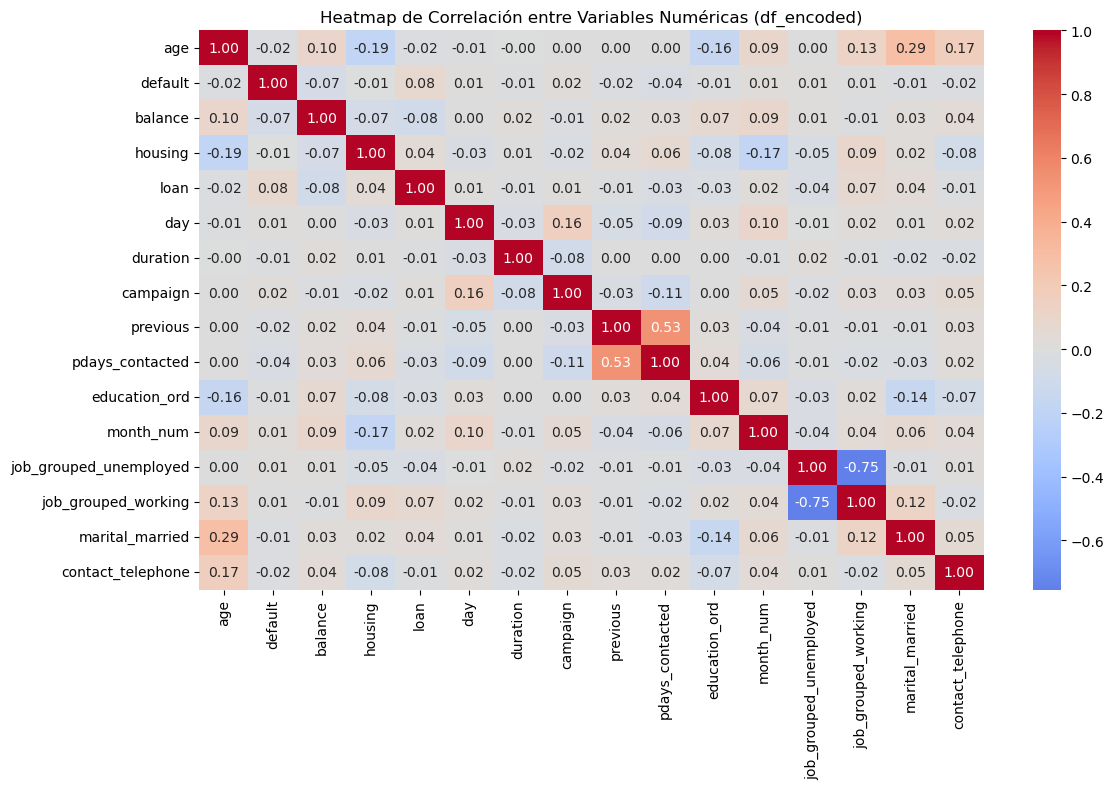

In [34]:
# Heatmap de correlación
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = df_scaled.drop(columns=['clase']).corr()  # Excluir 'clase' (categórica)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Heatmap de Correlación entre Variables Numéricas (df_encoded)')
plt.tight_layout()
plt.show()

c:\Users\italy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Regresión Logística
Accuracy: 0.8908139191978768
Matriz de confusión:
 [[  369  1218]
 [  263 11714]]
Reporte:
               precision    recall  f1-score   support

           1       0.58      0.23      0.33      1587
           0       0.91      0.98      0.94     11977

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564


🔹 Random Forest
Accuracy: 0.898849896785609
Matriz de confusión:
 [[  583  1004]
 [  368 11609]]
Reporte:
               precision    recall  f1-score   support

           1       0.61      0.37      0.46      1587
           0       0.92      0.97      0.94     11977

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



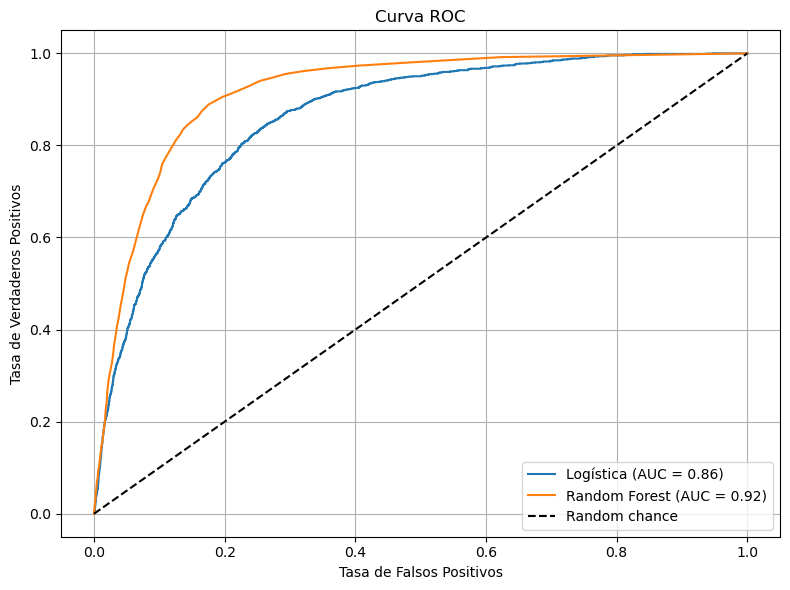

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X = df_encoded.drop(columns='clase')
y = df_encoded['clase']
# Convertir la columna clase de 'no'/'yes' a 0/1
y = y.map({'no': 0, 'yes': 1})

# 5. División en entrenamiento y prueba
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_t, y_train_t)
y_pred_log = logreg.predict(X_test_t)
y_proba_log = logreg.predict_proba(X_test_t)[:, 1]

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_t, y_train_t)
y_pred_rf = rf.predict(X_test_t)
y_proba_rf = rf.predict_proba(X_test_t)[:, 1]

#Evaluación
print("🔹 Regresión Logística")
print("Accuracy:", accuracy_score(y_test_t, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test_t, y_pred_log, labels = [1, 0]))
print("Reporte:\n", classification_report(y_test_t, y_pred_log, labels = [1, 0]))

print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test_t, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test_t, y_pred_rf, labels = [1, 0]))
print("Reporte:\n", classification_report(y_test_t, y_pred_rf, labels = [1, 0]))

#Curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test_t, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test_t, y_proba_rf)

auc_log = roc_auc_score(y_test_t, y_proba_log)
auc_rf = roc_auc_score(y_test_t, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logística (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random chance")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Resultados de evaluación (ordenados por Recall para 'yes'):
              Modelo  Accuracy  Recall (yes)  Precision (yes)  F1 (yes)
5       Tree_default  0.871646      0.456837         0.451995  0.454403
7       Tree_depth10  0.890666      0.387524         0.546181  0.453373
6        Tree_depth5  0.893615      0.374921         0.568834  0.451956
4   RF_estimators200  0.898629      0.369880         0.610187  0.460573
2         RF_default  0.898702      0.366100         0.612223  0.458202
8              KNN_5  0.888012      0.294896         0.539171  0.381263
3         RF_depth10  0.895901      0.291115         0.616822  0.395548
10            KNN_15  0.893173      0.245117         0.607812  0.349349
0             LogReg  0.892583      0.222432         0.612847  0.326399
1        LogReg_C0.5  0.892583      0.222432         0.612847  0.326399
9             KNN_10  0.891477      0.216761         0.600349  0.318519


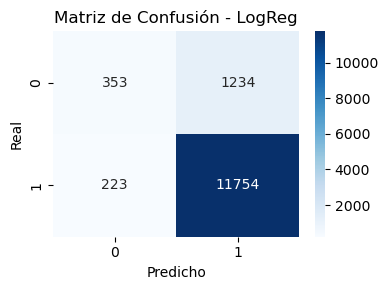

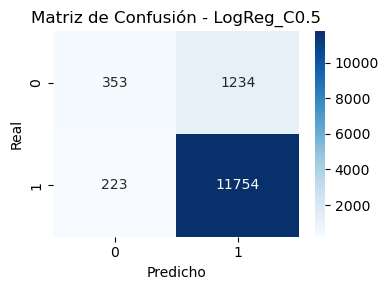

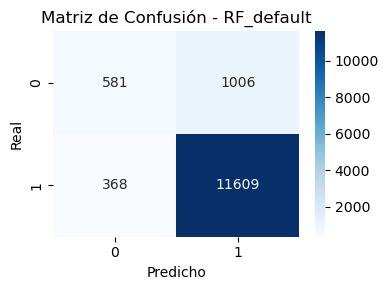

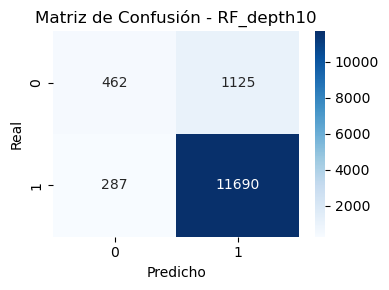

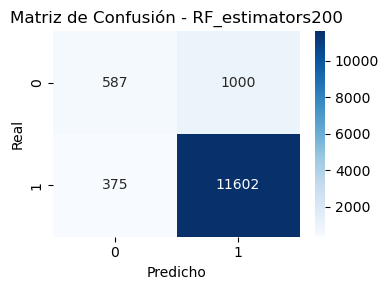

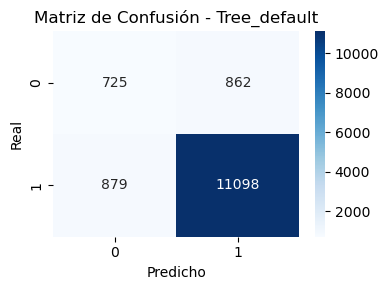

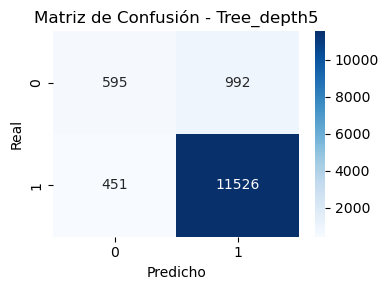

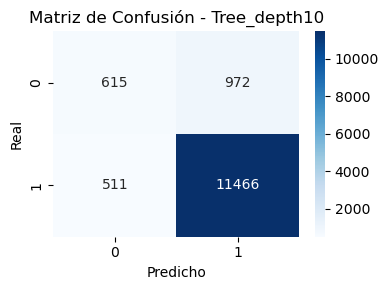

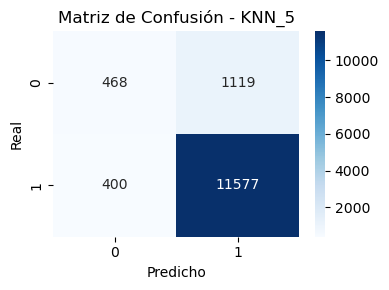

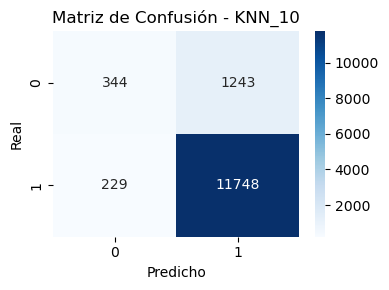

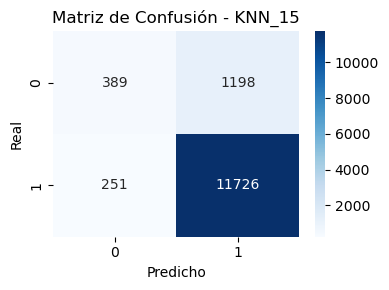


Mejores modelos según recall para 'yes': Tree_default y Tree_depth10

Resultados del VotingClassifier (umbral 0.2):
Exactitud: 0.8713
Recall (yes): 0.6074
Precisión (yes): 0.4619
F1 (yes): 0.5248
Tasa de Falsos Negativos (FNR): 0.3926


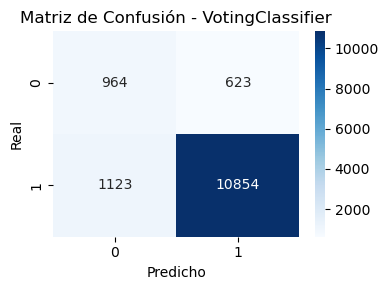


Ejemplos con mayor probabilidad de clase 'yes':
            age  default   balance  housing  loan       day  duration  \
40833  0.272727      0.0  0.075164      1.0   0.0  0.333333  0.035584   
31480  0.220779      0.0  0.072803      0.0   0.0  0.000000  0.059984   
34085  0.220779      0.0  0.078414      0.0   0.0  0.966667  0.193371   
26354  0.454545      0.0  0.072803      0.0   0.0  0.633333  0.105734   
41742  0.194805      0.0  0.088973      0.0   0.0  0.233333  0.124237   

       campaign  previous  pdays_contacted  education_ord  month_num  \
40833  0.016129  0.007273              1.0            0.5   0.636364   
31480  0.000000  0.003636              1.0            0.5   0.272727   
34085  0.000000  0.000000              0.0            0.5   0.272727   
26354  0.016129  0.000000              0.0            1.0   0.909091   
41742  0.016129  0.003636              1.0            1.0   0.818182   

       job_grouped_unemployed  job_grouped_working  marital_married  \
40833   

In [49]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier

# Cargar y preparar datos
df_encoded = pd.read_csv("DatoaTransformados.csv")
df_encoded = df_encoded.rename(columns={'y': 'clase'})

df = df_encoded.copy()
df['clase'] = df['clase'].map({'no': 0, 'yes': 1})
X = df.drop(columns='clase')
y = df['clase']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Escalamiento (opcional para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos con diferentes parámetros (ahora con un experimento extra cada uno)
modelos = {
    # --- Logistic Regression ---
    'LogReg': LogisticRegression(max_iter=1000),
    'LogReg_C0.5': LogisticRegression(C=0.5, max_iter=1000),  # experimento extra

    # --- Random Forest ---
    'RF_default': RandomForestClassifier(random_state=42),
    'RF_depth10': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'RF_estimators200': RandomForestClassifier(n_estimators=200, random_state=42),  # experimento extra

    # --- Decision Tree ---
    'Tree_default': DecisionTreeClassifier(random_state=42),
    'Tree_depth5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Tree_depth10': DecisionTreeClassifier(max_depth=10, random_state=42),  # experimento extra

    # --- KNN ---
    'KNN_5': KNeighborsClassifier(n_neighbors=5),
    'KNN_10': KNeighborsClassifier(n_neighbors=10),
    'KNN_15': KNeighborsClassifier(n_neighbors=15),  # experimento extra
}

# Entrenamiento, predicción y evaluación
resultados = []

for nombre, modelo in modelos.items():
    if 'KNN' in nombre or 'LogReg' in nombre:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    # Métricas para la clase 'yes' (1)
    reporte = classification_report(y_test, y_pred, labels=[0, 1], output_dict=True)
    acc = accuracy_score(y_test, y_pred)

    resultados.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'Recall (yes)': reporte['1']['recall'],
        'Precision (yes)': reporte['1']['precision'],
        'F1 (yes)': reporte['1']['f1-score']
    })

# Tabla comparativa de métricas
res_df = pd.DataFrame(resultados).sort_values(by='Recall (yes)', ascending=False)
print("Resultados de evaluación (ordenados por Recall para 'yes'):")
print(res_df)

# Mostrar una matriz de confusión para cada modelo
for nombre, modelo in modelos.items():
    if 'KNN' in nombre or 'LogReg' in nombre:
        y_pred = modelo.predict(X_test_scaled)
    else:
        y_pred = modelo.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# Seleccionar los dos mejores modelos según recall para 'yes'
mejor_modelo_1 = res_df.iloc[0]['Modelo']
mejor_modelo_2 = res_df.iloc[1]['Modelo']
print(f"\nMejores modelos según recall para 'yes': {mejor_modelo_1} y {mejor_modelo_2}")

# Crear VotingClassifier con los dos mejores modelos
voting_clf = VotingClassifier(
    estimators=[
        (mejor_modelo_1, modelos[mejor_modelo_1]),
        (mejor_modelo_2, modelos[mejor_modelo_2])
    ],
    voting='soft'
)

# Entrenar el VotingClassifier
if 'KNN' in mejor_modelo_1 or 'LogReg' in mejor_modelo_1 or 'KNN' in mejor_modelo_2 or 'LogReg' in mejor_modelo_2:
    voting_clf.fit(X_train_scaled, y_train)
    probas = voting_clf.predict_proba(X_test_scaled)[:, 1]
    y_pred_voting = (probas >= 0.2).astype(int)  # Umbral ajustado a 0.2 para maximizar recall
else:
    voting_clf.fit(X_train, y_train)
    probas = voting_clf.predict_proba(X_test)[:, 1]
    y_pred_voting = (probas >= 0.2).astype(int)

# Evaluar el VotingClassifier
reporte_voting = classification_report(y_test, y_pred_voting, labels=[0, 1], output_dict=True)
acc_voting = accuracy_score(y_test, y_pred_voting)

print("\nResultados del VotingClassifier (umbral 0.2):")
print(f"Exactitud: {round(acc_voting, 4)}")
print(f"Recall (yes): {round(reporte_voting['1']['recall'], 4)}")
print(f"Precisión (yes): {round(reporte_voting['1']['precision'], 4)}")
print(f"F1 (yes): {round(reporte_voting['1']['f1-score'], 4)}")
print(f"Tasa de Falsos Negativos (FNR): {round(1 - reporte_voting['1']['recall'], 4)}")

# Matriz de confusión para el VotingClassifier
cm_voting = confusion_matrix(y_test, y_pred_voting, labels=[1, 0])
plt.figure(figsize=(4, 3))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - VotingClassifier')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

# Obtener los índices de las 5 observaciones con mayor probabilidad de 'yes'
mejores_indices = np.argsort(probas)[-5:]

print("\nEjemplos con mayor probabilidad de clase 'yes':")
print(X_test.iloc[mejores_indices])
print("Probabilidades:", probas[mejores_indices])

Resultados de evaluación (ordenados por Recall para 'yes'):
              Modelo  Accuracy  Recall (yes)  Precision (yes)  F1 (yes)
5       Tree_default  0.871646      0.456837         0.451995  0.454403
7       Tree_depth10  0.890666      0.387524         0.546181  0.453373
6        Tree_depth5  0.893615      0.374921         0.568834  0.451956
4   RF_estimators200  0.898629      0.369880         0.610187  0.460573
2         RF_default  0.898702      0.366100         0.612223  0.458202
8              KNN_5  0.888012      0.294896         0.539171  0.381263
3         RF_depth10  0.895901      0.291115         0.616822  0.395548
10            KNN_15  0.893173      0.245117         0.607812  0.349349
0             LogReg  0.892583      0.222432         0.612847  0.326399
1        LogReg_C0.5  0.892583      0.222432         0.612847  0.326399
9             KNN_10  0.891477      0.216761         0.600349  0.318519


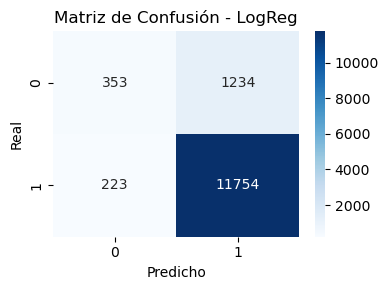

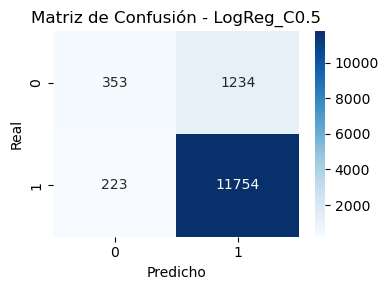

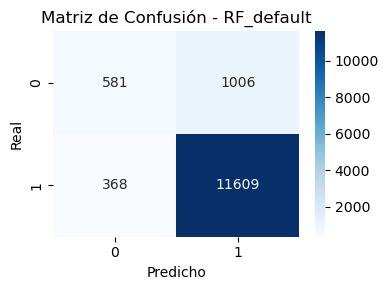

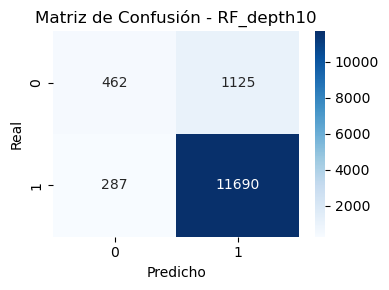

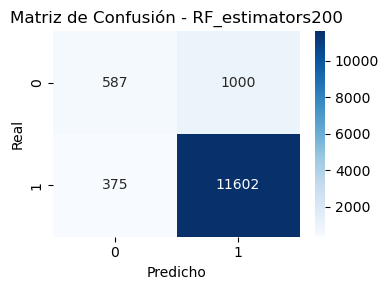

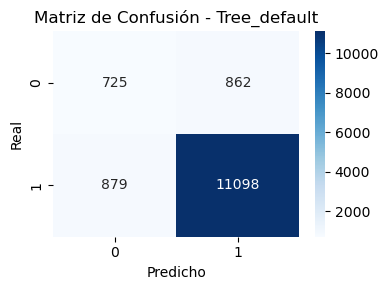

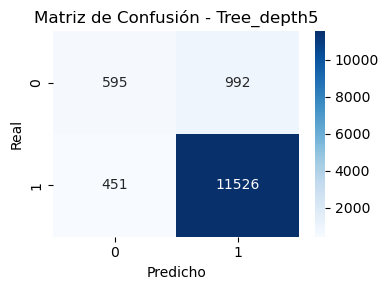

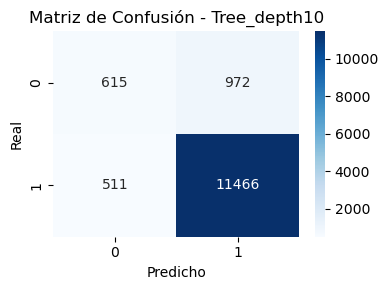

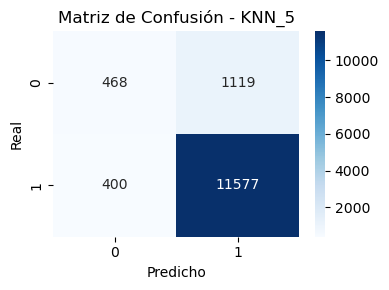

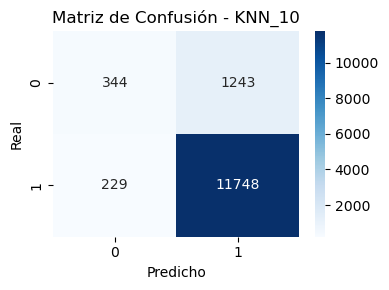

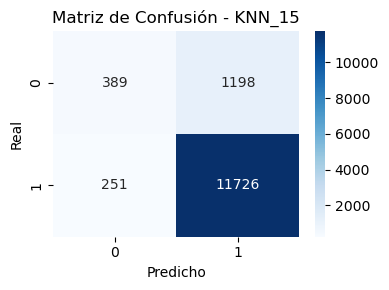


Mejores modelos según recall para 'yes': Tree_default y Tree_depth10

Resultados del VotingClassifier (umbral 0.2):
Exactitud: 0.8713
Recall (yes): 0.6074
Precisión (yes): 0.4619
F1 (yes): 0.5248
Tasa de Falsos Negativos (FNR): 0.3926


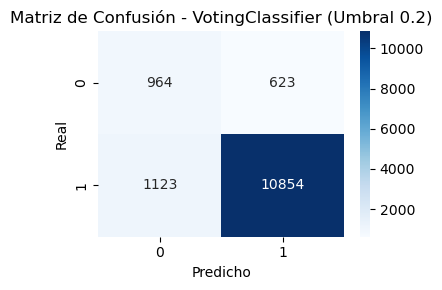


Ejemplos con mayor probabilidad de clase 'yes':
            age  default   balance  housing  loan       day  duration  \
40833  0.272727      0.0  0.075164      1.0   0.0  0.333333  0.035584   
31480  0.220779      0.0  0.072803      0.0   0.0  0.000000  0.059984   
34085  0.220779      0.0  0.078414      0.0   0.0  0.966667  0.193371   
26354  0.454545      0.0  0.072803      0.0   0.0  0.633333  0.105734   
41742  0.194805      0.0  0.088973      0.0   0.0  0.233333  0.124237   

       campaign  previous  pdays_contacted  education_ord  month_num  \
40833  0.016129  0.007273              1.0            0.5   0.636364   
31480  0.000000  0.003636              1.0            0.5   0.272727   
34085  0.000000  0.000000              0.0            0.5   0.272727   
26354  0.016129  0.000000              0.0            1.0   0.909091   
41742  0.016129  0.003636              1.0            1.0   0.818182   

       job_grouped_unemployed  job_grouped_working  marital_married  \
40833   

In [37]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier

# Cargar y preparar datos
df_encoded = pd.read_csv("DatoaTransformados.csv")
df_encoded = df_encoded.rename(columns={'y': 'clase'})

df = df_encoded.copy()
df['clase'] = df['clase'].map({'no': 0, 'yes': 1})
X = df.drop(columns='clase')
y = df['clase']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Escalamiento (opcional para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos con diferentes parámetros (ahora con un experimento extra cada uno)
modelos = {
    # --- Logistic Regression ---
    'LogReg': LogisticRegression(max_iter=1000),
    'LogReg_C0.5': LogisticRegression(C=0.5, max_iter=1000),  # experimento extra

    # --- Random Forest ---
    'RF_default': RandomForestClassifier(random_state=42),
    'RF_depth10': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'RF_estimators200': RandomForestClassifier(n_estimators=200, random_state=42),  # experimento extra

    # --- Decision Tree ---
    'Tree_default': DecisionTreeClassifier(random_state=42),
    'Tree_depth5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Tree_depth10': DecisionTreeClassifier(max_depth=10, random_state=42),  # experimento extra

    # --- KNN ---
    'KNN_5': KNeighborsClassifier(n_neighbors=5),
    'KNN_10': KNeighborsClassifier(n_neighbors=10),
    'KNN_15': KNeighborsClassifier(n_neighbors=15),  # experimento extra
}

# Entrenamiento, predicción y evaluación
resultados = []

for nombre, modelo in modelos.items():
    if 'KNN' in nombre or 'LogReg' in nombre:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    # Métricas para la clase 'yes' (1)
    reporte = classification_report(y_test, y_pred, labels=[0, 1], output_dict=True)
    acc = accuracy_score(y_test, y_pred)

    resultados.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'Recall (yes)': reporte['1']['recall'],
        'Precision (yes)': reporte['1']['precision'],
        'F1 (yes)': reporte['1']['f1-score']
    })

# Tabla comparativa de métricas
res_df = pd.DataFrame(resultados).sort_values(by='Recall (yes)', ascending=False)
print("Resultados de evaluación (ordenados por Recall para 'yes'):")
print(res_df)

# Mostrar una matriz de confusión para cada modelo
for nombre, modelo in modelos.items():
    if 'KNN' in nombre or 'LogReg' in nombre:
        y_pred = modelo.predict(X_test_scaled)
    else:
        y_pred = modelo.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# Seleccionar los dos mejores modelos según recall para 'yes'
mejor_modelo_1 = res_df.iloc[0]['Modelo']
mejor_modelo_2 = res_df.iloc[1]['Modelo']
print(f"\nMejores modelos según recall para 'yes': {mejor_modelo_1} y {mejor_modelo_2}")

# Crear VotingClassifier con los dos mejores modelos
voting_clf = VotingClassifier(
    estimators=[
        (mejor_modelo_1, modelos[mejor_modelo_1]),
        (mejor_modelo_2, modelos[mejor_modelo_2])
    ],
    voting='soft'
)

# Entrenar el VotingClassifier
if 'KNN' in mejor_modelo_1 or 'LogReg' in mejor_modelo_1 or 'KNN' in mejor_modelo_2 or 'LogReg' in mejor_modelo_2:
    voting_clf.fit(X_train_scaled, y_train)
    probas = voting_clf.predict_proba(X_test_scaled)[:, 1]
    y_pred_voting = (probas >= 0.2).astype(int)  # Umbral ajustado a 0.2 para maximizar recall
else:
    voting_clf.fit(X_train, y_train)
    probas = voting_clf.predict_proba(X_test)[:, 1]
    y_pred_voting = (probas >= 0.2).astype(int)

# Evaluar el VotingClassifier
reporte_voting = classification_report(y_test, y_pred_voting, labels=[0, 1], output_dict=True)
acc_voting = accuracy_score(y_test, y_pred_voting)

print("\nResultados del VotingClassifier (umbral 0.2):")
print(f"Exactitud: {round(acc_voting, 4)}")
print(f"Recall (yes): {round(reporte_voting['1']['recall'], 4)}")
print(f"Precisión (yes): {round(reporte_voting['1']['precision'], 4)}")
print(f"F1 (yes): {round(reporte_voting['1']['f1-score'], 4)}")
print(f"Tasa de Falsos Negativos (FNR): {round(1 - reporte_voting['1']['recall'], 4)}")

# Matriz de confusión para el VotingClassifier
cm_voting = confusion_matrix(y_test, y_pred_voting, labels = [1, 0])
plt.figure(figsize=(4, 3))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - VotingClassifier (Umbral 0.2)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

# Obtener los índices de las 5 observaciones con mayor probabilidad de 'yes'
mejores_indices = np.argsort(probas)[-5:]

print("\nEjemplos con mayor probabilidad de clase 'yes':")
print(X_test.iloc[mejores_indices])
print("Probabilidades:", probas[mejores_indices])

Tomando en cuenta los resultados, nos damos cuenta en la gráfica de la curva ROC el mejor modelo es RF_default (AUC = 0.91917), el segundo mejor modelo es RF_depth10 (AUC = 0.914093) y el tercer modelo a considerar es Tree_depth5 que tiene un recall competitivo (0.374921), lo que es útil para priorizar la clase 'yes'. Dado que el objetivo es maximizar el recall para la clase 'yes' (clientes que aceptan la oferta), combinaremos RF_default, RF_depth10, y Tree_depth5 en el VotingClassifier con voting='hard'

Exactitud en entrenamiento: 0.9345
Exactitud en evaluación:   0.8975

Recall
  Recall en entrenamiento: 0.5038
  Recall en evaluación:   0.3214

Precisión
  Precisión en entrenamiento: 0.8873
  Precisión en evaluación:   0.6197

F1
  F1 en entrenamiento: 0.6427
  F1 en evaluación:   0.4232



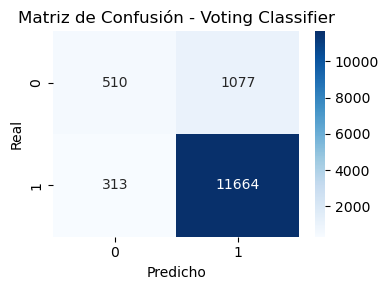

In [38]:
# Añadir el método de votación con los mejores modelos
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definir las listas para almacenar métricas
pTest = []
rTest = []
f1Test = []
exactitudEvaluacion = []

pTrain = []
rTrain = []
f1Train = []
exactitudEntrenamiento = []

# Seleccionar los mejores modelos para el VotingClassifier
# RF_default (mejor AUC), RF_depth10 (segundo mejor AUC), Tree_depth5 (buen recall para 'yes')
mejor_modelo_rf = modelos['RF_default']
mejor_modelo_rf_depth10 = modelos['RF_depth10']
mejor_modelo_tree = modelos['Tree_depth5']

# Definir el VotingClassifier con voting='hard'
algoritmo = VotingClassifier(estimators=[
    ("rf_default", mejor_modelo_rf),
    ("rf_depth10", mejor_modelo_rf_depth10),
    ("tree_depth5", mejor_modelo_tree)
], voting="hard")

# Entrenar el modelo de votación
# Dado que los modelos seleccionados no requieren datos escalados, usamos X_train y X_test directamente
modelov = algoritmo.fit(X_train, y_train)

# Clasificación para el conjunto de prueba y entrenamiento
claseAsignadaTestv = modelov.predict(X_test)  # Predicciones en el conjunto de prueba
claseAsignadaTrainv = modelov.predict(X_train)  # Predicciones en el conjunto de entrenamiento

# Evaluación de métricas
a_eval = accuracy_score(y_test, claseAsignadaTestv)
a_train = accuracy_score(y_train, claseAsignadaTrainv)

# Reportes de clasificación para métricas detalladas
reporteTest = classification_report(y_test, claseAsignadaTestv, labels=[0, 1], output_dict=True)
reporteTrain = classification_report(y_train, claseAsignadaTrainv, labels=[0, 1], output_dict=True)

# Guardar métricas para la clase positiva ('yes' = 1)
pTest.append(reporteTest['1']['precision'])
rTest.append(reporteTest['1']['recall'])
f1Test.append(reporteTest['1']['f1-score'])
exactitudEvaluacion.append(a_eval)

pTrain.append(reporteTrain['1']['precision'])
rTrain.append(reporteTrain['1']['recall'])
f1Train.append(reporteTrain['1']['f1-score'])
exactitudEntrenamiento.append(a_train)

# Mostrar resultados
print(f"Exactitud en entrenamiento: {round(a_train, 4)}")
print(f"Exactitud en evaluación:   {round(a_eval, 4)}\n")

print('Recall')
print(f"  Recall en entrenamiento: {round(rTrain[0], 4)}")
print(f"  Recall en evaluación:   {round(rTest[0], 4)}\n")

print('Precisión')
print(f"  Precisión en entrenamiento: {round(pTrain[0], 4)}")
print(f"  Precisión en evaluación:   {round(pTest[0], 4)}\n")

print('F1')
print(f"  F1 en entrenamiento: {round(f1Train[0], 4)}")
print(f"  F1 en evaluación:   {round(f1Test[0], 4)}\n")

# Matriz de confusión para el modelo de votación
cm_voting = confusion_matrix(y_test, claseAsignadaTestv, labels=[1, 0])
plt.figure(figsize=(4, 3))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Voting Classifier')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

***Reemplazaremos la celda anterior del VotingClassifier (que usaba RF_default, RF_depth10, y Tree_depth5 con voting='hard') por una nueva versión que Combine solo Tree_depth5 y RF_default.***

Exactitud en entrenamiento: 0.9615
Exactitud en evaluación:   0.8852

Recall
  Recall en entrenamiento: 0.9973
  Recall en evaluación:   0.6383

Precisión
  Precisión en entrenamiento: 0.7533
  Precisión en evaluación:   0.5075

F1
  F1 en entrenamiento: 0.8583
  F1 en evaluación:   0.5654



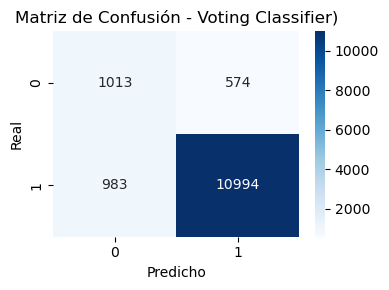

In [50]:
# Añadir el método de votación con los dos mejores modelos: Tree_depth5 y RF_default
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Definir las listas para almacenar métricas
pTest = []
rTest = []
f1Test = []
exactitudEvaluacion = []

pTrain = []
rTrain = []
f1Train = []
exactitudEntrenamiento = []

# Seleccionar los dos mejores modelos para el VotingClassifier
mejor_modelo_rf = modelos['RF_default']
mejor_modelo_tree = modelos['Tree_depth5']

# Definir el VotingClassifier con voting='soft'
algoritmo = VotingClassifier(estimators=[
    ("rf_default", mejor_modelo_rf),
    ("tree_depth5", mejor_modelo_tree)
], voting="soft")

# Entrenar el modelo de votación
# Dado que los modelos seleccionados no requieren datos escalados, usamos X_train y X_test directamente
modelov = algoritmo.fit(X_train, y_train)

# Obtener probabilidades para el conjunto de prueba y entrenamiento
probas_test = modelov.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 'yes'
probas_train = modelov.predict_proba(X_train)[:, 1]

# Ajustar el umbral de decisión a 0.3 para priorizar recall
umbral = 0.3
claseAsignadaTestv = (probas_test >= umbral).astype(int)  # Predicciones en el conjunto de prueba
claseAsignadaTrainv = (probas_train >= umbral).astype(int)  # Predicciones en el conjunto de entrenamiento

# Evaluación de métricas
a_eval = accuracy_score(y_test, claseAsignadaTestv)
a_train = accuracy_score(y_train, claseAsignadaTrainv)

# Reportes de clasificación para métricas detalladas
reporteTest = classification_report(y_test, claseAsignadaTestv, labels=[0, 1], output_dict=True)
reporteTrain = classification_report(y_train, claseAsignadaTrainv, labels=[0, 1], output_dict=True)

# Guardar métricas para la clase positiva ('yes' = 1)
pTest.append(reporteTest['1']['precision'])
rTest.append(reporteTest['1']['recall'])
f1Test.append(reporteTest['1']['f1-score'])
exactitudEvaluacion.append(a_eval)

pTrain.append(reporteTrain['1']['precision'])
rTrain.append(reporteTrain['1']['recall'])
f1Train.append(reporteTrain['1']['f1-score'])
exactitudEntrenamiento.append(a_train)

# Mostrar resultados
print(f"Exactitud en entrenamiento: {round(a_train, 4)}")
print(f"Exactitud en evaluación:   {round(a_eval, 4)}\n")

print('Recall')
print(f"  Recall en entrenamiento: {round(rTrain[0], 4)}")
print(f"  Recall en evaluación:   {round(rTest[0], 4)}\n")

print('Precisión')
print(f"  Precisión en entrenamiento: {round(pTrain[0], 4)}")
print(f"  Precisión en evaluación:   {round(pTest[0], 4)}\n")

print('F1')
print(f"  F1 en entrenamiento: {round(f1Train[0], 4)}")
print(f"  F1 en evaluación:   {round(f1Test[0], 4)}\n")

# Matriz de confusión para el modelo de votación con umbral ajustado
cm_voting = confusion_matrix(y_test, claseAsignadaTestv, labels=[1, 0])
plt.figure(figsize=(4, 3))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión - Voting Classifier)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.show()